In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("data/data_full.csv")  # Make sure this file is in your working directory

# Separate features and target
X = df.drop(columns=["no_data", "no_pasien", "kelas"])
y = df["kelas"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88       473
           1       0.86      0.83      0.84       392

    accuracy                           0.86       865
   macro avg       0.86      0.86      0.86       865
weighted avg       0.86      0.86      0.86       865

Confusion Matrix:
[[420  53]
 [ 67 325]]


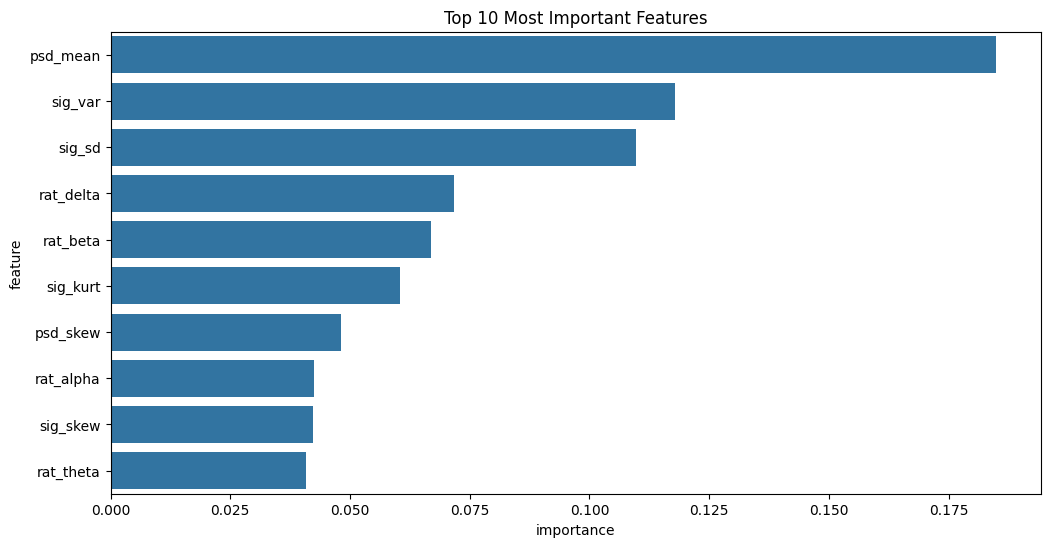

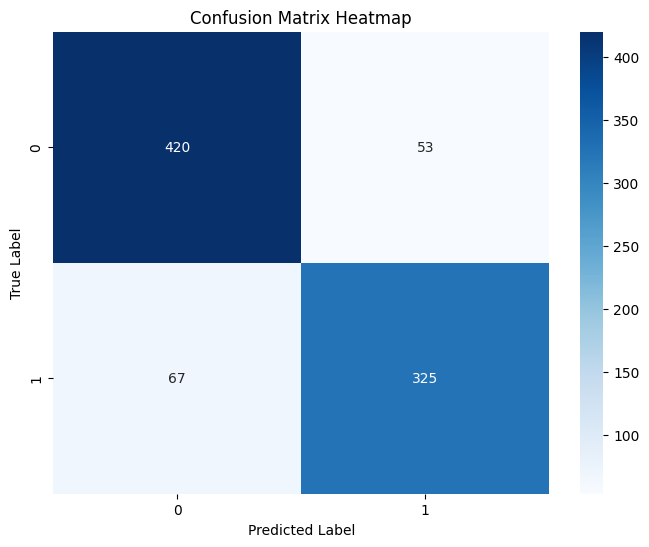


Dataset Information:
Total number of samples: 4321
Number of features: 16

Class distribution:
kelas
1    0.5
0    0.5
Name: proportion, dtype: float64

Model Performance:
Model Accuracy: 0.861

Cross-validation scores: [0.895 0.73  0.676 0.633 0.794]
Average CV score: 0.746 (+/- 0.184)


In [3]:

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Feature Importance Plot
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

# 2. Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 3. Basic Dataset Information
print("\nDataset Information:")
print(f"Total number of samples: {len(df)}")
print(f"Number of features: {X.shape[1]}")
print("\nClass distribution:")
print(y.value_counts(normalize=True).round(3))

# 4. Model Performance Metrics
print("\nModel Performance:")
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.3f}")

# 5. Cross-validation scores
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print(f"\nCross-validation scores: {cv_scores.round(3)}")
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

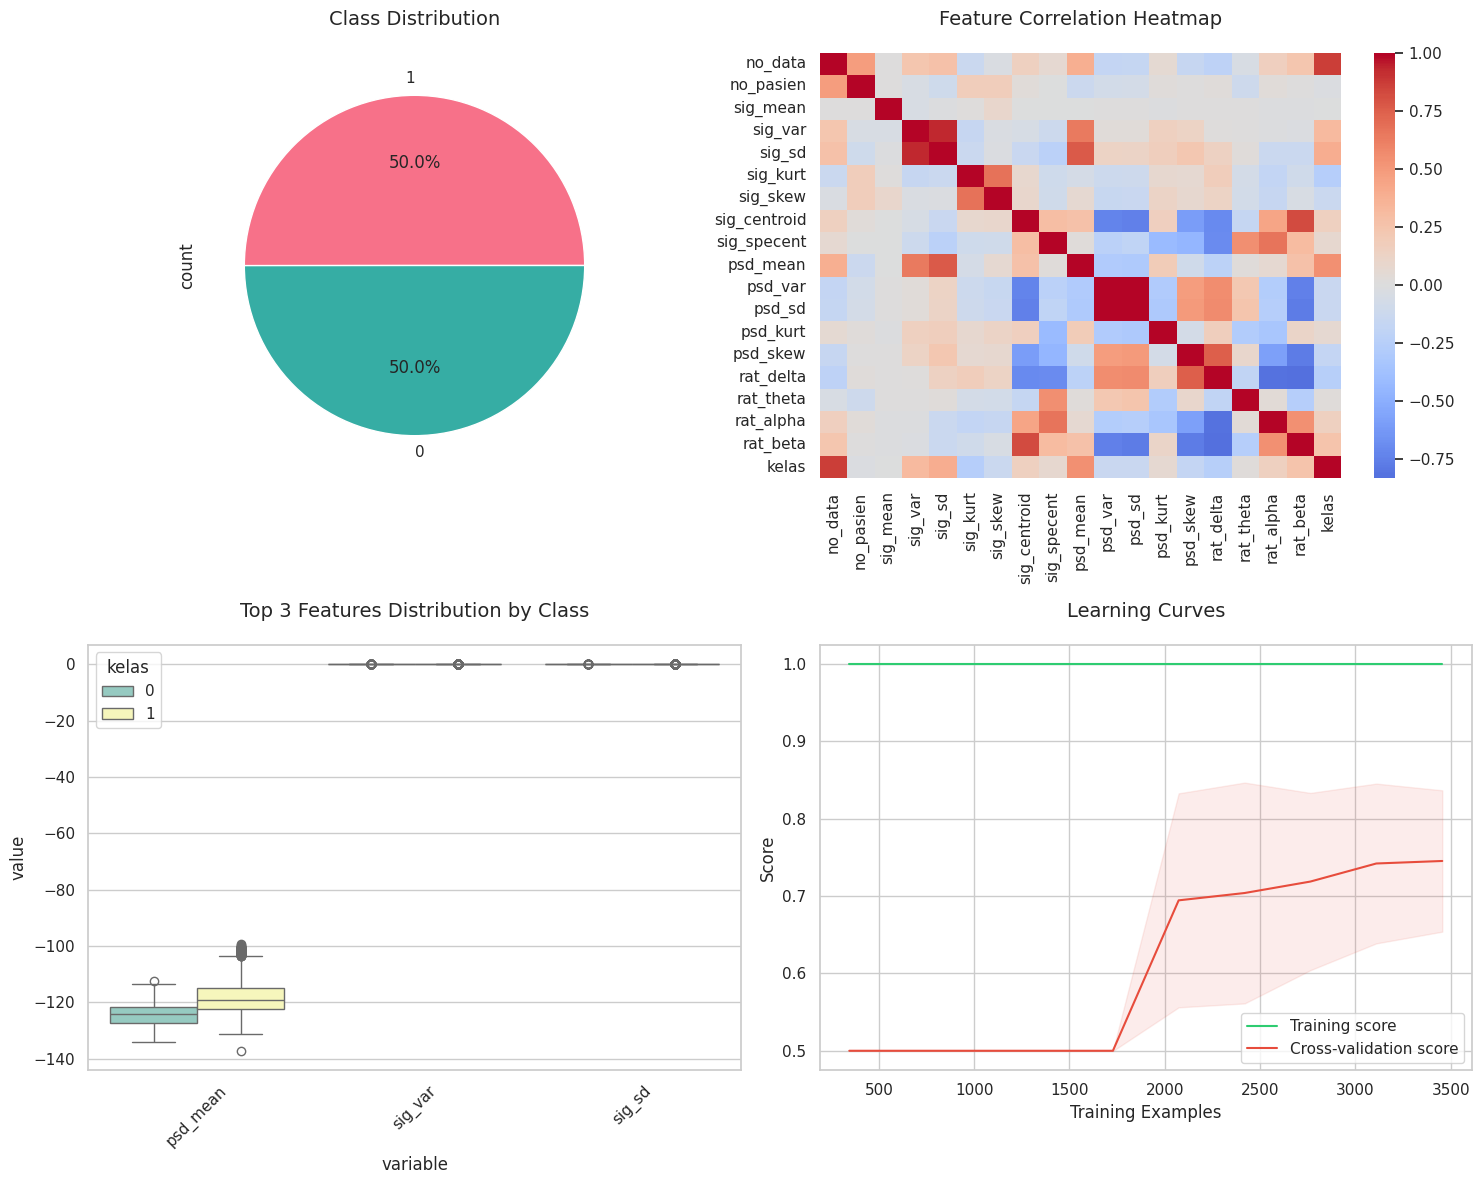


Summary Statistics for Top 3 Features:
          psd_mean       sig_var       sig_sd
count  4321.000000  4.321000e+03  4321.000000
mean   -121.128736  1.458344e-09     0.000029
std       6.068375  3.248430e-09     0.000025
min    -137.305696  1.280000e-11     0.000004
25%    -125.115568  1.610000e-10     0.000013
50%    -121.885372  4.480000e-10     0.000021
75%    -118.401166  1.200000e-09     0.000035
max     -99.403023  3.790000e-08     0.000195


In [6]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style and color palette
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (15, 12)
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

# Create a figure with multiple subplots
fig = plt.figure(figsize=(15, 12))

# 1. Class Distribution Pie Chart
plt.subplot(2, 2, 1)
colors = sns.color_palette("husl", n_colors=len(y.unique()))
y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Class Distribution', pad=20)

# 2. Feature Correlation Heatmap
plt.subplot(2, 2, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Feature Correlation Heatmap', pad=20)

# 3. Feature Distributions by Class
plt.subplot(2, 2, 3)
top_features = feature_importance.head(3)['feature'].values
melted_data = pd.melt(df, id_vars=['kelas'], value_vars=top_features)
sns.boxplot(x='variable', y='value', hue='kelas', data=melted_data, palette='Set3')
plt.title('Top 3 Features Distribution by Class', pad=20)
plt.xticks(rotation=45)

# 4. Learning Curves
plt.subplot(2, 2, 4)
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_scaled, y, cv=5, n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, label='Training score', color='#2ecc71')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='#e74c3c')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='#2ecc71')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='#e74c3c')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves', pad=20)
plt.legend(loc='best')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics for Top 3 Features:")
print(df[top_features].describe())